# Introduction:

## The Business Problem:
There are a lot of deadly accidents happening in the world, which we want to know how they became so deadly.
we will try to explore the data and find some insights by building a model that predicts accident's severity.

This project will interest the Transportation Authority of seattle, USA.

The project's insights will help to reduce the amount of deadly accidents.


## DATA
The data contains all the Collisions from the years: 2004-2020 in seattle, USA.
I will use the following features to predict the severity:
location, presons' count, day/night, where happened (interchange, alley and etc).


In [2]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=0e021182da3f7e61403efca9342e8565a6118ccf10f1b8f11fa76c57c03b35ab
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import wget
acc_data = wget.download('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')##downloading geospatial data

# Cleaning the Data

In [4]:
import pandas as pd
import numpy as np

In [6]:
df_coll = pd.read_csv('Data-Collisions.csv') 
df_coll.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
df_coll.rename(columns={"SEVERITYCODE" : "Deadly_Accident"}, inplace = True) 


In [8]:
df_coll = df_coll[['Deadly_Accident','X','Y','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','SDOT_COLDESC','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','ST_COLDESC']] 
df_coll.head()

,Deadly_Accident,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC
0,2,-122.323148,47.703140,Intersection,Angles,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,NaN,Entering at angle
1,1,-122.347294,47.647172,Block,Sideswipe,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,NaN,From same direction - both going straight - bo...
2,1,-122.334540,47.607871,Block,Parked Car,4,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,NaN,One parked--one moving
3,1,-122.334803,47.604803,Block,Other,3,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,NaN,From same direction - all others
4,2,-122.306426,47.545739,Intersection,Angles,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,NaN,Entering at angle


In [9]:
missing_data = df_coll.isnull()
missing_data.head(5)

,Deadly_Accident,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Deadly_Accident
False    194673
Name: Deadly_Accident, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

ST_COLDESC
False    189769
True       4904
Name: ST_COLDESC, dtype: int64



In [11]:
df_coll["Deadly_Accident"].replace(1, 0, inplace = True) ## replace 1 to 0 - "No"
df_coll["Deadly_Accident"].replace(2, 1, inplace = True) ## replace 2 to 1 - "Yes"
df_coll["Deadly_Accident"].value_counts() ## check the distribution to insure what we instered

0    136485
1     58188
Name: Deadly_Accident, dtype: int64

In [12]:
df_coll.dropna(subset=["X"], axis=0, inplace = True) ## remove all the rows that has no loctaion
missing_data = df_coll.isnull() ## check if the rows had dropped
for column in missing_data.columns.values.tolist(): 
    print(column)
    print (missing_data[column].value_counts())
    print("")

Deadly_Accident
False    189339
Name: Deadly_Accident, dtype: int64

X
False    189339
Name: X, dtype: int64

Y
False    189339
Name: Y, dtype: int64

ADDRTYPE
False    189339
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    184582
True       4757
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    189339
Name: PERSONCOUNT, dtype: int64

SDOT_COLDESC
False    189339
Name: SDOT_COLDESC, dtype: int64

WEATHER
False    184414
True       4925
Name: WEATHER, dtype: int64

ROADCOND
False    184481
True       4858
Name: ROADCOND, dtype: int64

LIGHTCOND
False    184327
True       5012
Name: LIGHTCOND, dtype: int64

SPEEDING
True     180619
False      8720
Name: SPEEDING, dtype: int64

ST_COLDESC
False    184582
True       4757
Name: ST_COLDESC, dtype: int64



In [13]:
df_coll.dropna(subset=["COLLISIONTYPE"], axis=0, inplace = True) ## remove all the rows that has COLLISION TYPE
missing_data = df_coll.isnull() ## check if the rows had dropped
for column in missing_data.columns.values.tolist(): 
    print(column)
    print (missing_data[column].value_counts())
    print("")

Deadly_Accident
False    184582
Name: Deadly_Accident, dtype: int64

X
False    184582
Name: X, dtype: int64

Y
False    184582
Name: Y, dtype: int64

ADDRTYPE
False    184582
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    184582
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    184582
Name: PERSONCOUNT, dtype: int64

SDOT_COLDESC
False    184582
Name: SDOT_COLDESC, dtype: int64

WEATHER
False    184393
True        189
Name: WEATHER, dtype: int64

ROADCOND
False    184460
True        122
Name: ROADCOND, dtype: int64

LIGHTCOND
False    184306
True        276
Name: LIGHTCOND, dtype: int64

SPEEDING
True     175863
False      8719
Name: SPEEDING, dtype: int64

ST_COLDESC
False    184582
Name: ST_COLDESC, dtype: int64



In [14]:
df_coll["WEATHER"].value_counts() ## check the distribution in order to complete the empty values

Clear                       108953
Raining                      32008
Overcast                     27130
Unknown                      13891
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [15]:
df_coll.replace("?", np.nan, inplace = True) ## if there any "?" it was replaced by Nan
df_coll["WEATHER"].replace(np.nan, 'Clear', inplace = True)
df_coll["WEATHER"].value_counts() ## check the distribution to insure what we instered

Clear                       109142
Raining                      32008
Overcast                     27130
Unknown                      13891
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [16]:
df_coll["ROADCOND"].value_counts() ## check the distribution in order to complete the empty values

Dry               122070
Wet                46054
Unknown            13835
Ice                 1176
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64

In [17]:
df_coll["ROADCOND"].replace(np.nan, 'Dry', inplace = True)
df_coll["ROADCOND"].value_counts() ## check the distribution to insure what we instered

Dry               122192
Wet                46054
Unknown            13835
Ice                 1176
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64

In [18]:
df_coll["LIGHTCOND"].value_counts() ## check the distribution in order to complete the empty values

Daylight                    113569
Dark - Street Lights On      47311
Unknown                      12430
Dusk                          5774
Dawn                          2421
Dark - No Street Lights       1450
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [19]:
df_coll["LIGHTCOND"].replace(np.nan, 'Daylight', inplace = True)
df_coll["LIGHTCOND"].value_counts() ## check the distribution to insure what we instered

Daylight                    113845
Dark - Street Lights On      47311
Unknown                      12430
Dusk                          5774
Dawn                          2421
Dark - No Street Lights       1450
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [20]:
df_coll["SPEEDING"].replace(np.nan, 0, inplace = True) ## in the df there is Y which means yes and all the other cells empty so I decided to instert 0 which means No 
df_coll["SPEEDING"].replace('Y', 1, inplace = True) ## convert Y to int (1)
df_coll["SPEEDING"].value_counts() ## check the distribution to see that we instered the values

0    175863
1      8719
Name: SPEEDING, dtype: int64

In [21]:
df_coll["ST_COLDESC"].value_counts() 

One parked--one moving                                                 42869
Entering at angle                                                      34460
From same direction - both going straight - one stopped - rear-end     25061
Fixed object                                                           12452
From same direction - both going straight - both moving - sideswipe    12304
                                                                       ...  
Railway Vehicle Strikes Pedalcyclist                                       2
Vehicle Strikes All Other Non-Domestic Animal                              2
Vehicle Hits State Road or Construction Machinery                          1
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Strikes Deer                                                       1
Name: ST_COLDESC, Length: 62, dtype: int64

In [22]:
df_coll.dropna(subset=["ST_COLDESC"], axis=0, inplace = True) 

In [23]:
missing_data = df_coll.isnull() ## check for the last if there is no missing value
for column in missing_data.columns.values.tolist(): 
    print(column)
    print (missing_data[column].value_counts())
    print("")

Deadly_Accident
False    184582
Name: Deadly_Accident, dtype: int64

X
False    184582
Name: X, dtype: int64

Y
False    184582
Name: Y, dtype: int64

ADDRTYPE
False    184582
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    184582
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    184582
Name: PERSONCOUNT, dtype: int64

SDOT_COLDESC
False    184582
Name: SDOT_COLDESC, dtype: int64

WEATHER
False    184582
Name: WEATHER, dtype: int64

ROADCOND
False    184582
Name: ROADCOND, dtype: int64

LIGHTCOND
False    184582
Name: LIGHTCOND, dtype: int64

SPEEDING
False    184582
Name: SPEEDING, dtype: int64

ST_COLDESC
False    184582
Name: ST_COLDESC, dtype: int64



## Correct data format

In [24]:
df_coll.dtypes ## learning about columns types, everthing OK

Deadly_Accident      int64
X                  float64
Y                  float64
ADDRTYPE            object
COLLISIONTYPE       object
PERSONCOUNT          int64
SDOT_COLDESC        object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
SPEEDING             int64
ST_COLDESC          object
dtype: object

## Data Normalization

In [25]:
df_coll['PERSONCOUNT'] = df_coll['PERSONCOUNT']/df_coll['PERSONCOUNT'].max()


## Divide the location to bins: South, Center and North

In [26]:
bins = np.linspace(min(df_coll["Y"]), max(df_coll["Y"]), 4)
group_names = ['South', 'Center', 'North']
df_coll['Area'] = pd.cut(df_coll['Y'], bins, labels=group_names, include_lowest=True)
df_coll['Area'].head(20)

0      North
1     Center
2     Center
3     Center
4      South
5      North
6     Center
7     Center
8     Center
9      South
11     South
12     South
13    Center
14     North
16     North
18     South
19    Center
20     North
21     North
22    Center
Name: Area, dtype: category
Categories (3, object): ['South' < 'Center' < 'North']

In [27]:
df_coll['Area'].value_counts() ## insure that the divide was useful

Center    82401
North     56502
South     45679
Name: Area, dtype: int64

In [28]:
df_coll.drop(['X','Y'] , axis = 1, inplace = True) ## we don't need lan and long so we drop them

In [29]:
df_coll.reset_index(inplace = True, drop = True) ## arrange the new df after cleaning
df_coll.head()

,Deadly_Accident,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC,Area
0,1,Intersection,Angles,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,0,Entering at angle,North
1,0,Block,Sideswipe,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,0,From same direction - both going straight - bo...,Center
2,0,Block,Parked Car,0.049383,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,0,One parked--one moving,Center
3,0,Block,Other,0.037037,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,0,From same direction - all others,Center
4,1,Intersection,Angles,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,0,Entering at angle,South



## Indicator variable (or dummy variable)

In [30]:
%pip install seaborn

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [32]:
from scipy import stats

In [33]:
df_coll.head()

,Deadly_Accident,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC,Area
0,1,Intersection,Angles,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,0,Entering at angle,North
1,0,Block,Sideswipe,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,0,From same direction - both going straight - bo...,Center
2,0,Block,Parked Car,0.049383,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,0,One parked--one moving,Center
3,0,Block,Other,0.037037,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,0,From same direction - all others,Center
4,1,Intersection,Angles,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,0,Entering at angle,South


# correlation
 I will use ANOVA methodology to analyze the categorical features' correlation

In [34]:
## ST_COLDESC column correlation 
grouped_test_ST_COLDESC = df_coll[['Deadly_Accident', 'ST_COLDESC']]
grouped_test2 = grouped_test_ST_COLDESC.groupby(['ST_COLDESC'])
grouped_test2.head()

,Deadly_Accident,ST_COLDESC
0,1,Entering at angle
1,0,From same direction - both going straight - bo...
2,0,One parked--one moving
3,0,From same direction - all others
4,1,Entering at angle
...,...,...
175034,0,Strikes or Was Struck by Object from the Load ...
175370,0,Strikes or Was Struck by a Part of Another Veh...
176672,0,All Other Multi Vehicle
177320,0,Strikes or Was Struck by a Part of Another Veh...


In [35]:
col_list = grouped_test_ST_COLDESC.ST_COLDESC.unique().tolist() ## get all the unique values into list
col_list

['Entering at angle',
 'From same direction - both going straight - both moving - sideswipe',
 'One parked--one moving',
 'From same direction - all others',
 'Vehicle Strikes Pedalcyclist',
 'From same direction - both going straight - one stopped - rear-end',
 'From opposite direction - all others',
 'From opposite direction - one left turn - one straight',
 'Other object',
 'From same direction - both going straight - both moving - rear-end',
 'Fixed object',
 'One car leaving driveway access',
 'From same direction - both going straight - one stopped - sideswipe',
 'Vehicle - Pedalcyclist',
 'Vehicle going straight hits pedestrian',
 'One car leaving parked position',
 'One car entering driveway access',
 'Vehicle turning right hits pedestrian',
 'Vehicle overturned',
 'From same direction - one right turn - one straight',
 'From same direction - one left turn - one straight',
 'Same direction -- both turning right -- one stopped -- rear end',
 'Same direction -- both turning left 

## ANOVA methology - As F-score is larger and P-value is smaller the correlation is stronger.
f_oneway - function that calculate the F-score and P-value

In [36]:
## I wrote a script that print a long string that I will use to calculate all the ST_COLDESC values
b = ""
for i in col_list:
    a = "grouped_test2.get_group('" + i + "')['Deadly_Accident'],"
    b = b + a
    
print(b)

grouped_test2.get_group('Entering at angle')['Deadly_Accident'],grouped_test2.get_group('From same direction - both going straight - both moving - sideswipe')['Deadly_Accident'],grouped_test2.get_group('One parked--one moving')['Deadly_Accident'],grouped_test2.get_group('From same direction - all others')['Deadly_Accident'],grouped_test2.get_group('Vehicle Strikes Pedalcyclist')['Deadly_Accident'],grouped_test2.get_group('From same direction - both going straight - one stopped - rear-end')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - all others')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - one left turn - one straight')['Deadly_Accident'],grouped_test2.get_group('Other object')['Deadly_Accident'],grouped_test2.get_group('From same direction - both going straight - both moving - rear-end')['Deadly_Accident'],grouped_test2.get_group('Fixed object')['Deadly_Accident'],grouped_test2.get_group('One car leaving driveway access')['Deadly_Acci

In [37]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Entering at angle')['Deadly_Accident'],grouped_test2.get_group('From same direction - both going straight - both moving - sideswipe')['Deadly_Accident'],grouped_test2.get_group('One parked--one moving')['Deadly_Accident'],grouped_test2.get_group('From same direction - all others')['Deadly_Accident'],grouped_test2.get_group('Vehicle Strikes Pedalcyclist')['Deadly_Accident'],grouped_test2.get_group('From same direction - both going straight - one stopped - rear-end')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - all others')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - one left turn - one straight')['Deadly_Accident'],grouped_test2.get_group('Other object')['Deadly_Accident'],grouped_test2.get_group('From same direction - both going straight - both moving - rear-end')['Deadly_Accident'],grouped_test2.get_group('Fixed object')['Deadly_Accident'],grouped_test2.get_group('One car leaving driveway access')['Deadly_Accident'],grouped_test2.get_group('From same direction - both going straight - one stopped - sideswipe')['Deadly_Accident'],grouped_test2.get_group('Vehicle - Pedalcyclist')['Deadly_Accident'],grouped_test2.get_group('Vehicle going straight hits pedestrian')['Deadly_Accident'],grouped_test2.get_group('One car leaving parked position')['Deadly_Accident'],grouped_test2.get_group('One car entering driveway access')['Deadly_Accident'],grouped_test2.get_group('Vehicle turning right hits pedestrian')['Deadly_Accident'],grouped_test2.get_group('Vehicle overturned')['Deadly_Accident'],grouped_test2.get_group('From same direction - one right turn - one straight')['Deadly_Accident'],grouped_test2.get_group('From same direction - one left turn - one straight')['Deadly_Accident'],grouped_test2.get_group('Same direction -- both turning right -- one stopped -- rear end')['Deadly_Accident'],grouped_test2.get_group('Same direction -- both turning left -- both moving -- sideswipe')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - both going straight - sideswipe')['Deadly_Accident'],grouped_test2.get_group('One car entering parked position')['Deadly_Accident'],grouped_test2.get_group('Vehicle turning left hits pedestrian')['Deadly_Accident'],grouped_test2.get_group('Vehicle Hits Other Road or Construction Machinery')['Deadly_Accident'],grouped_test2.get_group('Same direction -- both turning right -- both moving -- sideswipe')['Deadly_Accident'],grouped_test2.get_group('Vehicle backing hits pedestrian')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - both moving - head-on')['Deadly_Accident'],grouped_test2.get_group('Railway Vehicle Strikes Vehicle')['Deadly_Accident'],grouped_test2.get_group('All other non-collision')['Deadly_Accident'],grouped_test2.get_group('Pedalcyclist Strikes Moving Vehicle')['Deadly_Accident'],grouped_test2.get_group('Same direction -- both turning left -- both moving -- rear end')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - one stopped - head-on')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - both going straight - one stopped - sideswipe')['Deadly_Accident'],grouped_test2.get_group('Vehicle hits Pedestrian - All Other Actions')['Deadly_Accident'],grouped_test2.get_group('Same direction -- both turning right -- one stopped -- sideswipe')['Deadly_Accident'],grouped_test2.get_group('From opposite direction - one left turn - one right turn')['Deadly_Accident'],grouped_test2.get_group('Breakage of any part of the vehicle resulting in injury or in further property damage')['Deadly_Accident'],grouped_test2.get_group('Same direction -- both turning right -- both moving -- rear end')['Deadly_Accident'],grouped_test2.get_group('Vehicle Strikes Railway Vehicle')['Deadly_Accident'],grouped_test2.get_group('Strikes or Was Struck by Object from the Load of Another Vehicle')['Deadly_Accident'],grouped_test2.get_group('Vehicle Struck by City Road or Construction Machinery')['Deadly_Accident'],grouped_test2.get_group('Same direction -- both turning left -- one stopped -- sideswipe')['Deadly_Accident'],grouped_test2.get_group('Vehicle Struck by Other Road or Construction Machinery')['Deadly_Accident'],grouped_test2.get_group('Non-domestic animal (deer, bear, elk, etc)')['Deadly_Accident'],grouped_test2.get_group('Same direction -- both turning left -- one stopped -- rear end')['Deadly_Accident'],grouped_test2.get_group('Not stated')['Deadly_Accident'],grouped_test2.get_group('Railway Vehicle Strikes Pedalcyclist')['Deadly_Accident'],grouped_test2.get_group('Railway Vehicle Strikes Pedestrian')['Deadly_Accident'],grouped_test2.get_group('Vehicle Hits City Road or Construction Machinery')['Deadly_Accident'],grouped_test2.get_group('Domestic animal other (cat, dog, etc)')['Deadly_Accident'],grouped_test2.get_group('Person fell, jumped or was pushed from vehicle')['Deadly_Accident'],grouped_test2.get_group('Fire started in vehicle')['Deadly_Accident'],grouped_test2.get_group('Vehicle Hits State Road or Construction Machinery')['Deadly_Accident'],grouped_test2.get_group('Vehicle Strikes All Other Non-Domestic Animal')['Deadly_Accident'],grouped_test2.get_group('Pedalcyclist Strikes Pedalcyclist or Pedestrian')['Deadly_Accident'],grouped_test2.get_group('Pedalcyclist All Other Involvements ONE UNIT - PEDALCYCLIST ONLY or PEDALCYCLIST STR')['Deadly_Accident'],grouped_test2.get_group('Vehicle Strikes Deer')['Deadly_Accident'],grouped_test2.get_group('All Other Multi Vehicle')['Deadly_Accident'],grouped_test2.get_group('Strikes or Was Struck by a Part of Another Vehicle (Not from Load)')['Deadly_Accident'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 896.271278026926 , P = 0.0


F-score large P-value small means strong corr

In [38]:
grouped_test_Area = df_coll[['Deadly_Accident', 'Area']]
grouped_test = grouped_test_Area[['Deadly_Accident', 'Area']].groupby(['Area'])
grouped_test.head()

,Deadly_Accident,Area
0,1,North
1,0,Center
2,0,Center
3,0,Center
4,1,South
5,0,North
6,0,Center
7,1,Center
9,1,South
10,0,South


In [40]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('North')['Deadly_Accident'], grouped_test.get_group('Center')['Deadly_Accident'], grouped_test.get_group('South')['Deadly_Accident'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 99.3879789417427 , P = 7.237262154136091e-44


F-score large P-value small means strong corr

In [41]:
## LIGHTCOND column correlation 
grouped_test_LIGHTCOND = df_coll[['Deadly_Accident', 'LIGHTCOND']]
grouped_test3 = grouped_test_LIGHTCOND.groupby(['LIGHTCOND'])
col_list_light = grouped_test_LIGHTCOND.LIGHTCOND.unique().tolist() ## get all the unique values into list

In [42]:
b = ""
for i in col_list_light:
    a = "grouped_test3.get_group('" + i + "')['Deadly_Accident'],"
    b = b + a
    
print(b)

grouped_test3.get_group('Daylight')['Deadly_Accident'],grouped_test3.get_group('Dark - Street Lights On')['Deadly_Accident'],grouped_test3.get_group('Dark - No Street Lights')['Deadly_Accident'],grouped_test3.get_group('Unknown')['Deadly_Accident'],grouped_test3.get_group('Dusk')['Deadly_Accident'],grouped_test3.get_group('Dawn')['Deadly_Accident'],grouped_test3.get_group('Dark - Street Lights Off')['Deadly_Accident'],grouped_test3.get_group('Other')['Deadly_Accident'],grouped_test3.get_group('Dark - Unknown Lighting')['Deadly_Accident'],


In [43]:
f_val, p_val = stats.f_oneway(grouped_test3.get_group('Daylight')['Deadly_Accident'],grouped_test3.get_group('Dark - Street Lights On')['Deadly_Accident'],grouped_test3.get_group('Dark - No Street Lights')['Deadly_Accident'],grouped_test3.get_group('Unknown')['Deadly_Accident'],grouped_test3.get_group('Dusk')['Deadly_Accident'],grouped_test3.get_group('Dawn')['Deadly_Accident'],grouped_test3.get_group('Dark - Street Lights Off')['Deadly_Accident'],grouped_test3.get_group('Other')['Deadly_Accident'],grouped_test3.get_group('Dark - Unknown Lighting')['Deadly_Accident'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 569.5701095310094 , P = 0.0


F-score large P-value small means strong corr

In [44]:
grouped_test_ROADCOND = df_coll[['Deadly_Accident', 'ROADCOND']]
grouped_test4 = grouped_test_ROADCOND[['Deadly_Accident', 'ROADCOND']].groupby(['ROADCOND'])
col_list_road = grouped_test_ROADCOND.ROADCOND.unique().tolist()

In [45]:
b = ""
for i in col_list_road:
    a = "grouped_test4.get_group('" + i + "')['Deadly_Accident'],"
    b = b + a
    
print(b)

grouped_test4.get_group('Wet')['Deadly_Accident'],grouped_test4.get_group('Dry')['Deadly_Accident'],grouped_test4.get_group('Unknown')['Deadly_Accident'],grouped_test4.get_group('Snow/Slush')['Deadly_Accident'],grouped_test4.get_group('Ice')['Deadly_Accident'],grouped_test4.get_group('Other')['Deadly_Accident'],grouped_test4.get_group('Sand/Mud/Dirt')['Deadly_Accident'],grouped_test4.get_group('Standing Water')['Deadly_Accident'],grouped_test4.get_group('Oil')['Deadly_Accident'],


In [46]:
f_val, p_val = stats.f_oneway(grouped_test4.get_group('Wet')['Deadly_Accident'],grouped_test4.get_group('Dry')['Deadly_Accident'],grouped_test4.get_group('Unknown')['Deadly_Accident'],grouped_test4.get_group('Snow/Slush')['Deadly_Accident'],grouped_test4.get_group('Ice')['Deadly_Accident'],grouped_test4.get_group('Other')['Deadly_Accident'],grouped_test4.get_group('Sand/Mud/Dirt')['Deadly_Accident'],grouped_test4.get_group('Standing Water')['Deadly_Accident'],grouped_test4.get_group('Oil')['Deadly_Accident'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 602.3289481872912 , P = 0.0


F-score large P-value small means strong corr

In [47]:
grouped_test_WEATHER = df_coll[['Deadly_Accident', 'WEATHER']]
grouped_test5 = grouped_test_WEATHER[['Deadly_Accident', 'WEATHER']].groupby(['WEATHER'])
col_list_weth = grouped_test_WEATHER.WEATHER.unique().tolist()

In [48]:
b = ""
for i in col_list_weth:
    a = "grouped_test5.get_group('" + i + "')['Deadly_Accident'],"
    b = b + a
    
print(b)

grouped_test5.get_group('Overcast')['Deadly_Accident'],grouped_test5.get_group('Raining')['Deadly_Accident'],grouped_test5.get_group('Clear')['Deadly_Accident'],grouped_test5.get_group('Unknown')['Deadly_Accident'],grouped_test5.get_group('Other')['Deadly_Accident'],grouped_test5.get_group('Snowing')['Deadly_Accident'],grouped_test5.get_group('Fog/Smog/Smoke')['Deadly_Accident'],grouped_test5.get_group('Sleet/Hail/Freezing Rain')['Deadly_Accident'],grouped_test5.get_group('Blowing Sand/Dirt')['Deadly_Accident'],grouped_test5.get_group('Severe Crosswind')['Deadly_Accident'],grouped_test5.get_group('Partly Cloudy')['Deadly_Accident'],


In [49]:
f_val, p_val = stats.f_oneway(grouped_test5.get_group('Overcast')['Deadly_Accident'],grouped_test5.get_group('Raining')['Deadly_Accident'],grouped_test5.get_group('Clear')['Deadly_Accident'],grouped_test5.get_group('Unknown')['Deadly_Accident'],grouped_test5.get_group('Other')['Deadly_Accident'],grouped_test5.get_group('Snowing')['Deadly_Accident'],grouped_test5.get_group('Fog/Smog/Smoke')['Deadly_Accident'],grouped_test5.get_group('Sleet/Hail/Freezing Rain')['Deadly_Accident'],grouped_test5.get_group('Blowing Sand/Dirt')['Deadly_Accident'],grouped_test5.get_group('Severe Crosswind')['Deadly_Accident'],grouped_test5.get_group('Partly Cloudy')['Deadly_Accident'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 472.97466022858777 , P = 0.0


In [50]:
grouped_test_SDOT_COLDESC = df_coll[['Deadly_Accident', 'SDOT_COLDESC']]
grouped_test6 = grouped_test_SDOT_COLDESC[['Deadly_Accident', 'SDOT_COLDESC']].groupby(['SDOT_COLDESC'])
col_list_sdot = grouped_test_SDOT_COLDESC.SDOT_COLDESC.unique().tolist()

In [51]:
b = ""
for i in col_list_sdot:
    a = "grouped_test6.get_group('" + i + "')['Deadly_Accident'],"
    b = b + a
    
print(b)

grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END')['Deadly_Accident'],grouped_test6.get_group('NOT ENOUGH INFORMATION / NOT APPLICABLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHCILE STRUCK PEDESTRIAN')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST OVERTURNED IN ROA

In [52]:
f_val, p_val = stats.f_oneway(grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END')['Deadly_Accident'],grouped_test6.get_group('NOT ENOUGH INFORMATION / NOT APPLICABLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHCILE STRUCK PEDESTRIAN')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST OVERTURNED IN ROAD')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK OBJECT IN ROAD')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE OVERTURNED IN ROAD')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK PEDESTRIAN')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE ')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE RAN OFF ROAD - NO COLLISION')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK TRAIN')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK OBJECT IN ROAD')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK PEDESTRIAN')['Deadly_Accident'],grouped_test6.get_group('MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK PEDALCYCLIST FRONT END AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE RAN OFF ROAD - NO COLLISION')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK PEDALCYCLIST REAR END')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE AT ANGLE')['Deadly_Accident'],grouped_test6.get_group('DRIVERLESS VEHICLE STRUCK OBJECT IN ROADWAY')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST RAN OFF ROAD - HIT FIXED OBJECT')['Deadly_Accident'],grouped_test6.get_group('PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE')['Deadly_Accident'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 832.3252211721152 , P = 0.0


In [53]:
grouped_test_COLLISIONTYPE = df_coll[['Deadly_Accident', 'COLLISIONTYPE']]
grouped_test7 = grouped_test_COLLISIONTYPE[['Deadly_Accident', 'COLLISIONTYPE']].groupby(['COLLISIONTYPE'])
col_list_type = grouped_test_COLLISIONTYPE.COLLISIONTYPE.unique().tolist()

In [54]:
b = ""
for i in col_list_type:
    a = "grouped_test7.get_group('" + i + "')['Deadly_Accident'],"
    b = b + a
    
print(b)

grouped_test7.get_group('Angles')['Deadly_Accident'],grouped_test7.get_group('Sideswipe')['Deadly_Accident'],grouped_test7.get_group('Parked Car')['Deadly_Accident'],grouped_test7.get_group('Other')['Deadly_Accident'],grouped_test7.get_group('Cycles')['Deadly_Accident'],grouped_test7.get_group('Rear Ended')['Deadly_Accident'],grouped_test7.get_group('Head On')['Deadly_Accident'],grouped_test7.get_group('Left Turn')['Deadly_Accident'],grouped_test7.get_group('Pedestrian')['Deadly_Accident'],grouped_test7.get_group('Right Turn')['Deadly_Accident'],


In [55]:
f_val, p_val = stats.f_oneway(grouped_test7.get_group('Angles')['Deadly_Accident'],grouped_test7.get_group('Sideswipe')['Deadly_Accident'],grouped_test7.get_group('Parked Car')['Deadly_Accident'],grouped_test7.get_group('Other')['Deadly_Accident'],grouped_test7.get_group('Cycles')['Deadly_Accident'],grouped_test7.get_group('Rear Ended')['Deadly_Accident'],grouped_test7.get_group('Head On')['Deadly_Accident'],grouped_test7.get_group('Left Turn')['Deadly_Accident'],grouped_test7.get_group('Pedestrian')['Deadly_Accident'],grouped_test7.get_group('Right Turn')['Deadly_Accident'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 5656.322956542205 , P = 0.0


In [56]:
grouped_test_ADDRTYPE = df_coll[['Deadly_Accident', 'ADDRTYPE']]
grouped_test8 = grouped_test_ADDRTYPE[['Deadly_Accident', 'ADDRTYPE']].groupby(['ADDRTYPE'])
col_list_addr = grouped_test_ADDRTYPE.ADDRTYPE.unique().tolist()

In [57]:
b = ""
for i in col_list_addr:
    a = "grouped_test8.get_group('" + i + "')['Deadly_Accident'],"
    b = b + a
    
print(b)

grouped_test8.get_group('Intersection')['Deadly_Accident'],grouped_test8.get_group('Block')['Deadly_Accident'],


In [58]:
f_val, p_val = stats.f_oneway(grouped_test8.get_group('Intersection')['Deadly_Accident'],grouped_test8.get_group('Block')['Deadly_Accident'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 7739.026142578873 , P = 0.0


Now I will corr function to analyze the numerical features

In [59]:
df_coll.corr()
## PERSONCOUNT, SPEEDING

,Deadly_Accident,PERSONCOUNT,SPEEDING
Deadly_Accident,1.000000,0.127633,0.037518
PERSONCOUNT,0.127633,1.000000,-0.001623
SPEEDING,0.037518,-0.001623,1.000000


As we can there is weak corr between SPEEDING TO Deadly_Accident, I believe we can drop this column

In [60]:
df_coll.drop('SPEEDING' ,axis = 1, inplace = True) ## drop SPEEDING column

In [61]:
df_coll.head()

,Deadly_Accident,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,Area
0,1,Intersection,Angles,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,Entering at angle,North
1,0,Block,Sideswipe,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,From same direction - both going straight - bo...,Center
2,0,Block,Parked Car,0.049383,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,One parked--one moving,Center
3,0,Block,Other,0.037037,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,From same direction - all others,Center
4,1,Intersection,Angles,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,Entering at angle,South


## Now we continue to the next level

# Methodology 

# Machine learning : Logistic Regression

in the next section I will convert the data to numerical values

In [97]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [98]:
X = df_coll[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'SDOT_COLDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLDESC',
       'Area']]

In [99]:
y = df_coll.Deadly_Accident

In [100]:
df_coll.columns

Index(['Deadly_Accident', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'SDOT_COLDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLDESC',
       'Area'],
      dtype='object')

In [101]:
X.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,Area
0,Intersection,Angles,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,Entering at angle,North
1,Block,Sideswipe,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,From same direction - both going straight - bo...,Center
2,Block,Parked Car,0.049383,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,One parked--one moving,Center
3,Block,Other,0.037037,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,From same direction - all others,Center
4,Intersection,Angles,0.024691,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,Entering at angle,South


In [102]:
X.iloc[:, 0]

0         Intersection
1                Block
2                Block
3                Block
4         Intersection
              ...     
184577           Block
184578           Block
184579    Intersection
184580    Intersection
184581           Block
Name: ADDRTYPE, Length: 184582, dtype: object

In [103]:
df_coll.ADDRTYPE.unique()

array(['Intersection', 'Block'], dtype=object)

In [104]:
le_ADDRTYPE = preprocessing.LabelEncoder()
le_ADDRTYPE.fit(['Intersection', 'Block'])
X.iloc[:, 0] = le_ADDRTYPE.transform(X.iloc[:, 0])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [105]:
df_coll.COLLISIONTYPE.unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'],
      dtype=object)

In [106]:
le_COLLISIONTYPE = preprocessing.LabelEncoder()
le_COLLISIONTYPE.fit(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'])
X.iloc[:, 1] = le_COLLISIONTYPE.transform(X.iloc[:, 1])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [107]:
df_coll.SDOT_COLDESC.unique().tolist()

['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
 'PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
 'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE',
 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END',
 'NOT ENOUGH INFORMATION / NOT APPLICABLE',
 'MOTOR VEHCILE STRUCK PEDESTRIAN',
 'PEDALCYCLIST OVERTURNED IN ROAD',
 'MOTOR VEHICLE STRUCK OBJECT IN ROAD',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE',
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END',
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE',
 'MOTOR VEHICLE OVERTURNED IN ROAD',
 'DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE',
 'PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE',
 'DRIVERLESS VEHICLE

In [108]:
le_SDOT_COLDESC = preprocessing.LabelEncoder()
le_SDOT_COLDESC.fit(['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
 'PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
 'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE',
 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END',
 'NOT ENOUGH INFORMATION / NOT APPLICABLE',
 'MOTOR VEHCILE STRUCK PEDESTRIAN',
 'PEDALCYCLIST OVERTURNED IN ROAD',
 'MOTOR VEHICLE STRUCK OBJECT IN ROAD',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE',
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END',
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE',
 'MOTOR VEHICLE OVERTURNED IN ROAD',
 'DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE',
 'PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE',
 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE AT ANGLE',
 'PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE',
 'PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END',
 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
 'DRIVERLESS VEHICLE STRUCK PEDESTRIAN',
 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE ',
 'MOTOR VEHICLE RAN OFF ROAD - NO COLLISION',
 'MOTOR VEHICLE STRUCK TRAIN',
 'PEDALCYCLIST STRUCK OBJECT IN ROAD',
 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE',
 'PEDALCYCLIST STRUCK PEDESTRIAN',
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT SIDE SIDESWIPE',
 'PEDALCYCLIST STRUCK PEDALCYCLIST FRONT END AT ANGLE',
 'DRIVERLESS VEHICLE RAN OFF ROAD - NO COLLISION',
 'PEDALCYCLIST STRUCK PEDALCYCLIST REAR END',
 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE',
 'PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE AT ANGLE',
 'DRIVERLESS VEHICLE STRUCK OBJECT IN ROADWAY',
 'PEDALCYCLIST RAN OFF ROAD - HIT FIXED OBJECT',
 'PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE'])
X.iloc[:, 3] = le_SDOT_COLDESC.transform(X.iloc[:, 3])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [109]:
df_coll.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [110]:
le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
X.iloc[:, 4] = le_WEATHER.transform(X.iloc[:, 4])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [111]:
df_coll.ROADCOND.unique()

array(['Wet', 'Dry', 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [112]:
le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit(['Wet', 'Dry', 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'])
X.iloc[:, 5] = le_ROADCOND.transform(X.iloc[:, 5])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [113]:
df_coll.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

In [114]:
le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'])
X.iloc[:, 6] = le_LIGHTCOND.transform(X.iloc[:, 6])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [115]:
df_coll.ST_COLDESC.unique().tolist()

['Entering at angle',
 'From same direction - both going straight - both moving - sideswipe',
 'One parked--one moving',
 'From same direction - all others',
 'Vehicle Strikes Pedalcyclist',
 'From same direction - both going straight - one stopped - rear-end',
 'From opposite direction - all others',
 'From opposite direction - one left turn - one straight',
 'Other object',
 'From same direction - both going straight - both moving - rear-end',
 'Fixed object',
 'One car leaving driveway access',
 'From same direction - both going straight - one stopped - sideswipe',
 'Vehicle - Pedalcyclist',
 'Vehicle going straight hits pedestrian',
 'One car leaving parked position',
 'One car entering driveway access',
 'Vehicle turning right hits pedestrian',
 'Vehicle overturned',
 'From same direction - one right turn - one straight',
 'From same direction - one left turn - one straight',
 'Same direction -- both turning right -- one stopped -- rear end',
 'Same direction -- both turning left 

In [116]:
le_ST_COLDESC = preprocessing.LabelEncoder()
le_ST_COLDESC.fit(['Entering at angle',
 'From same direction - both going straight - both moving - sideswipe',
 'One parked--one moving',
 'From same direction - all others',
 'Vehicle Strikes Pedalcyclist',
 'From same direction - both going straight - one stopped - rear-end',
 'From opposite direction - all others',
 'From opposite direction - one left turn - one straight',
 'Other object',
 'From same direction - both going straight - both moving - rear-end',
 'Fixed object',
 'One car leaving driveway access',
 'From same direction - both going straight - one stopped - sideswipe',
 'Vehicle - Pedalcyclist',
 'Vehicle going straight hits pedestrian',
 'One car leaving parked position',
 'One car entering driveway access',
 'Vehicle turning right hits pedestrian',
 'Vehicle overturned',
 'From same direction - one right turn - one straight',
 'From same direction - one left turn - one straight',
 'Same direction -- both turning right -- one stopped -- rear end',
 'Same direction -- both turning left -- both moving -- sideswipe',
 'From opposite direction - both going straight - sideswipe',
 'One car entering parked position',
 'Vehicle turning left hits pedestrian',
 'Vehicle Hits Other Road or Construction Machinery',
 'Same direction -- both turning right -- both moving -- sideswipe',
 'Vehicle backing hits pedestrian',
 'From opposite direction - both moving - head-on',
 'Railway Vehicle Strikes Vehicle',
 'All other non-collision',
 'Pedalcyclist Strikes Moving Vehicle',
 'Same direction -- both turning left -- both moving -- rear end',
 'From opposite direction - one stopped - head-on',
 'From opposite direction - both going straight - one stopped - sideswipe',
 'Vehicle hits Pedestrian - All Other Actions',
 'Same direction -- both turning right -- one stopped -- sideswipe',
 'From opposite direction - one left turn - one right turn',
 'Breakage of any part of the vehicle resulting in injury or in further property damage',
 'Same direction -- both turning right -- both moving -- rear end',
 'Vehicle Strikes Railway Vehicle',
 'Strikes or Was Struck by Object from the Load of Another Vehicle',
 'Vehicle Struck by City Road or Construction Machinery',
 'Same direction -- both turning left -- one stopped -- sideswipe',
 'Vehicle Struck by Other Road or Construction Machinery',
 'Non-domestic animal (deer, bear, elk, etc)',
 'Same direction -- both turning left -- one stopped -- rear end',
 'Not stated',
 'Railway Vehicle Strikes Pedalcyclist',
 'Railway Vehicle Strikes Pedestrian',
 'Vehicle Hits City Road or Construction Machinery',
 'Domestic animal other (cat, dog, etc)',
 'Person fell, jumped or was pushed from vehicle',
 'Fire started in vehicle',
 'Vehicle Hits State Road or Construction Machinery',
 'Vehicle Strikes All Other Non-Domestic Animal',
 'Pedalcyclist Strikes Pedalcyclist or Pedestrian',
 'Pedalcyclist All Other Involvements ONE UNIT - PEDALCYCLIST ONLY or PEDALCYCLIST STR',
 'Vehicle Strikes Deer',
 'All Other Multi Vehicle',
 'Strikes or Was Struck by a Part of Another Vehicle (Not from Load)'])
X.iloc[:, 7] = le_ST_COLDESC.transform(X.iloc[:, 7])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [117]:
df_coll.Area.unique()

['North', 'Center', 'South']
Categories (3, object): ['South' < 'Center' < 'North']

In [118]:
le_Area = preprocessing.LabelEncoder()
le_Area.fit(['North', 'Center', 'South'])
X.iloc[:, 8] = le_Area.transform(X.iloc[:, 8])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [119]:
X.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,Area
0,1,0,0.024691,14,4,8,5,4,1
1,0,9,0.024691,16,6,8,2,16,0
2,0,5,0.049383,17,4,0,5,27,0
3,0,4,0.037037,14,1,0,5,14,0
4,1,0,0.024691,14,6,8,5,4,2


In [120]:
temp1 = df_coll.Deadly_Accident
temp1 = pd.concat([temp1, X], axis=1)
temp1.head()

,Deadly_Accident,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,Area
0,1,1,0,0.024691,14,4,8,5,4,1
1,0,0,9,0.024691,16,6,8,2,16,0
2,0,0,5,0.049383,17,4,0,5,27,0
3,0,0,4,0.037037,14,1,0,5,14,0
4,1,1,0,0.024691,14,6,8,5,4,2


In [121]:
temp1.corr() ## just for general knowledge

,Deadly_Accident,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,Area
Deadly_Accident,1.000000,0.200601,-0.129741,0.127633,-0.036518,-0.106009,-0.046157,-0.056721,0.090855,0.022076
ADDRTYPE,0.200601,1.000000,-0.481823,0.062622,-0.198577,-0.086219,-0.026438,-0.050947,-0.176725,-0.034510
COLLISIONTYPE,-0.129741,-0.481823,1.000000,0.012533,0.081282,0.028065,-0.001675,0.030438,0.362848,-0.003029
PERSONCOUNT,0.127633,0.062622,0.012533,1.000000,-0.026802,-0.060862,-0.028536,-0.039518,-0.076163,-0.000186
SDOT_COLDESC,-0.036518,-0.198577,0.081282,-0.026802,1.000000,0.145854,0.058117,0.145220,0.138571,-0.013764
WEATHER,-0.106009,-0.086219,0.028065,-0.060862,0.145854,1.000000,0.748500,0.203853,0.058366,-0.009187
ROADCOND,-0.046157,-0.026438,-0.001675,-0.028536,0.058117,0.748500,1.000000,0.021078,-0.003007,0.017219
LIGHTCOND,-0.056721,-0.050947,0.030438,-0.039518,0.145220,0.203853,0.021078,1.000000,0.058432,0.003403
ST_COLDESC,0.090855,-0.176725,0.362848,-0.076163,0.138571,0.058366,-0.003007,0.058432,1.000000,-0.096674
Area,0.022076,-0.034510,-0.003029,-0.000186,-0.013764,-0.009187,0.017219,0.003403,-0.096674,1.000000


## In the next section I will use logistic regression beacuse our output is Yes or no (1 or 0)


In [128]:
npX = np.asarray(X) ## convert X(df) to np array
npX[0:5]

array([[1.0000000e+00, 0.0000000e+00, 2.4691358e-02, 1.4000000e+01,
        4.0000000e+00, 8.0000000e+00, 5.0000000e+00, 4.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 9.0000000e+00, 2.4691358e-02, 1.6000000e+01,
        6.0000000e+00, 8.0000000e+00, 2.0000000e+00, 1.6000000e+01,
        0.0000000e+00],
       [0.0000000e+00, 5.0000000e+00, 4.9382716e-02, 1.7000000e+01,
        4.0000000e+00, 0.0000000e+00, 5.0000000e+00, 2.7000000e+01,
        0.0000000e+00],
       [0.0000000e+00, 4.0000000e+00, 3.7037037e-02, 1.4000000e+01,
        1.0000000e+00, 0.0000000e+00, 5.0000000e+00, 1.4000000e+01,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 2.4691358e-02, 1.4000000e+01,
        6.0000000e+00, 8.0000000e+00, 5.0000000e+00, 4.0000000e+00,
        2.0000000e+00]])

In [129]:
npY = np.asarray(y) ## convert y to np array
npY[0:5]

array([1, 0, 0, 0, 1])

In [130]:
npX = preprocessing.StandardScaler().fit(npX).transform(npX)
npX[0:5]

array([[ 1.38540755, -1.60088434, -0.34423279, -0.49629055,  0.34025268,
         1.49393411,  0.3598038 , -1.13841265,  0.24594864],
       [-0.72180926,  1.6151249 , -0.34423279,  0.10658477,  1.0493154 ,
         1.49393411, -1.40660147, -0.21444809, -0.99030463],
       [-0.72180926,  0.18578746,  1.12835405,  0.40802244,  0.34025268,
        -0.70345034,  0.3598038 ,  0.63251942, -0.99030463],
       [-0.72180926, -0.1715469 ,  0.39206063, -0.49629055, -0.72334139,
        -0.70345034,  0.3598038 , -0.36844218, -0.99030463],
       [ 1.38540755, -1.60088434, -0.34423279, -0.49629055,  1.0493154 ,
         1.49393411,  0.3598038 , -1.13841265,  1.48220191]])

## Train/Test dataset

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(npX, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147665, 9) (147665,)
Test set: (36917, 9) (36917,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
yhat = LR.predict(X_test) ## predict
yhat

array([0, 0, 0, ..., 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [134]:
yhat_prob = LR.predict_proba(X_test) 
yhat_prob

array([[0.80624949, 0.19375051],
       [0.6889016 , 0.3110984 ],
       [0.80680567, 0.19319433],
       ...,
       [0.74214709, 0.25785291],
       [0.76207692, 0.23792308],
       [0.76094316, 0.23905684]])

In [135]:
from sklearn.metrics import classification_report

In [136]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.74      0.95      0.83     25769
           1       0.68      0.22      0.34     11148

    accuracy                           0.73     36917
   macro avg       0.71      0.59      0.59     36917
weighted avg       0.72      0.73      0.68     36917



## the accuracy of the model is 73%

# Machine learning : Decision Tree Classifier

## In the next section I will use Decision Tree Classifier to try more calssifiaction algoritm

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [139]:
AccTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
AccTree.fit(X_trainset,y_trainset)
predTree = AccTree.predict(X_testset)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7461851015801354


In [140]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict 
    AccTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_trainset,y_trainset) 
    predTree = AccTree.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, predTree)

    


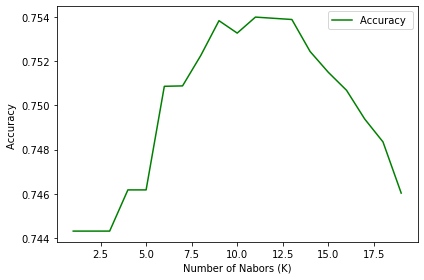

In [141]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [142]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7539864559819414 with k= 11


In [143]:
AccTree = DecisionTreeClassifier(criterion="entropy", max_depth = 11) ## lets insert max_depth = 11
AccTree.fit(X_trainset,y_trainset)
predTree = AccTree.predict(X_testset)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7540045146726863


## In the next section I will convert the numerical values reverse to categorical values

In [144]:
X.COLLISIONTYPE.value_counts()

5    46381
0    34460
7    32968
4    22277
9    18034
3    13624
6     6551
1     5378
8     2912
2     1997
Name: COLLISIONTYPE, dtype: int64

In [145]:
df_coll.COLLISIONTYPE.value_counts()

Parked Car    46381
Angles        34460
Rear Ended    32968
Other         22277
Sideswipe     18034
Left Turn     13624
Pedestrian     6551
Cycles         5378
Right Turn     2912
Head On        1997
Name: COLLISIONTYPE, dtype: int64

I will comapre the values from df X to df_coll and then I can convert the values. <br>
0 = Angles <br>
1 = Cycles <br>
2 = Head On <br>
3 = Left turn <br>
4 = Other <br>
5 = Parked Car <br>
6 = Pedestrian <br>
7 = Rear Ended <br>
8 = right turn <br> 
9 = Sideswipe            

# Results 
## DecisionTrees model is better! 

# CONCLUSION <br>
Therefore I made visualisation to the Decision Tree, AccTree_4floors <br>
<br>

First, I want you to look on the 2 blue blocks (leaves) on the forth floor (don't count the first node) <br>
**_The COLLISIONTYPE worth 6 which means pedestrian._** <br>
<br>
do you ask what is the point? <br>

the point is it doesn't matter if the accident happened in block or at intersection <br>
if there is pedestrian it will be deadly. <br>


So, Transportation Authority of seattle, USA needs to pay attention to following points. <br> <br> 
- Bridges instead intersection 
- More sidewalks
- Fences between sidewalks to road
- Integrated Street which the limit km/h is 30
- Explanation to pedestrians how to behave safely in cross ways